In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [5]:
import pandas as pd


In [6]:
df = pd.read_csv(r"C:\Desktop\titanic_cleaned.csv")  # Update path if needed
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.565736,1,0,A/5 21171,-0.502445,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.663861,1,0,PC 17599,0.786845,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.258337,0,0,STON/O2. 3101282,-0.488854,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.433312,1,0,113803,0.420730,False,True
4,5,0,3,"Allen, Mr. William Henry",0,0.433312,0,0,373450,-0.486337,False,True


In [7]:
# Select relevant columns
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]

# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Check for any remaining missing values
print(df.isnull().sum())

# Convert categorical variable 'Sex' to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# No missing values should remain now
df.head()


Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


C:\Users\sathv\AppData\Local\Temp\ipykernel_17740\3542872160.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,NaN,-0.565736,1,0,-0.502445,False,True
1,1,1,NaN,0.663861,1,0,0.786845,False,False
2,1,3,NaN,-0.258337,0,0,-0.488854,False,True
3,1,1,NaN,0.433312,1,0,0.420730,False,True
4,0,3,NaN,0.433312,0,0,-0.486337,False,True


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Train and test data prepared and scaled.")


Train and test data prepared and scaled.


C:\Users\sathv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\sathv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\sathv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [10]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


C:\Users\sathv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: [1]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\sathv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: [1]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [11]:
# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Predict on test data with linear kernel
y_pred_linear = svm_linear.predict(X_test)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Predict on test data with RBF kernel
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate linear kernel results
print("Linear Kernel SVM:")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

# Evaluate RBF kernel results
print("\nRBF Kernel SVM:")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


Linear Kernel SVM:
[[92  8]
 [43 30]]
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       100
           1       0.79      0.41      0.54        73

    accuracy                           0.71       173
   macro avg       0.74      0.67      0.66       173
weighted avg       0.73      0.71      0.68       173


RBF Kernel SVM:
[[94  6]
 [43 30]]
              precision    recall  f1-score   support

           0       0.69      0.94      0.79       100
           1       0.83      0.41      0.55        73

    accuracy                           0.72       173
   macro avg       0.76      0.68      0.67       173
weighted avg       0.75      0.72      0.69       173



In [15]:
# Select only 2 features for visualization, e.g., 'Age' and 'Fare'
features_2d = ['Age', 'Fare']
X_2d = df[features_2d].values
y_2d = df['Survived'].values

# Split into train and test sets (using only 2 features)
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y_2d, test_size=0.2, random_state=42, stratify=y_2d
)

# Standardize the features
scaler_2d = StandardScaler()
X_train_2d = scaler_2d.fit_transform(X_train_2d)
X_test_2d = scaler_2d.transform(X_test_2d)


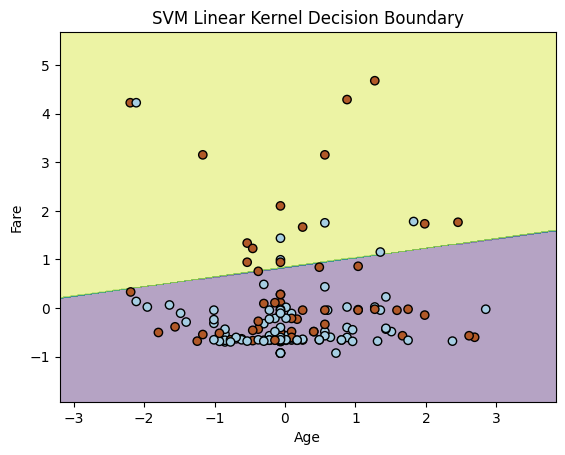

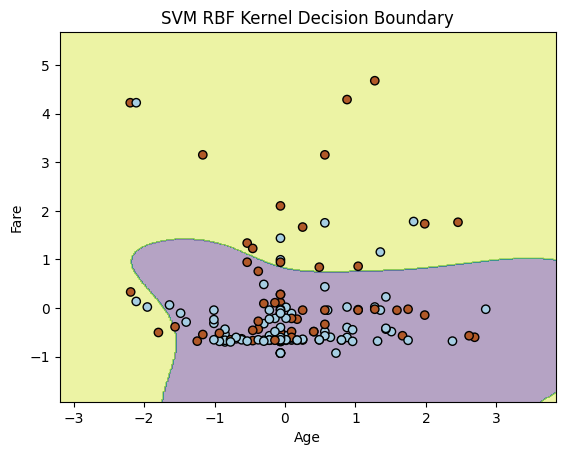

In [16]:
# Train SVM with linear kernel on 2D data
svm_linear_2d = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear_2d.fit(X_train_2d, y_train_2d)

# Train SVM with RBF kernel on 2D data
svm_rbf_2d = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf_2d.fit(X_train_2d, y_train_2d)

# Function to plot decision boundary (reuse from previous cells)
def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    plt.xlabel(features_2d[0])
    plt.ylabel(features_2d[1])
    plt.title(title)
    plt.show()

# Plot decision boundary for linear kernel
plot_decision_boundary(svm_linear_2d, X_test_2d, y_test_2d, "SVM Linear Kernel Decision Boundary")

# Plot decision boundary for RBF kernel
plot_decision_boundary(svm_rbf_2d, X_test_2d, y_test_2d, "SVM RBF Kernel Decision Boundary")


In [14]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for RBF kernel
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1, 10],
    'kernel': ['rbf']
}

# Grid Search with 5-fold CV
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate best model on test data
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best parameters found: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.7308414138254614
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.92      0.79       100
           1       0.80      0.45      0.58        73

    accuracy                           0.72       173
   macro avg       0.75      0.69      0.69       173
weighted avg       0.74      0.72      0.70       173

Confusion Matrix:
 [[92  8]
 [40 33]]


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data for linear kernel SVM
y_pred_linear = svm_linear_2d.predict(X_test_2d)
print("Linear Kernel SVM Classification Report:")
print(classification_report(y_test_2d, y_pred_linear))

print("Linear Kernel SVM Confusion Matrix:")
print(confusion_matrix(y_test_2d, y_pred_linear))

# Predict on test data for RBF kernel SVM
y_pred_rbf = svm_rbf_2d.predict(X_test_2d)
print("\nRBF Kernel SVM Classification Report:")
print(classification_report(y_test_2d, y_pred_rbf))

print("RBF Kernel SVM Confusion Matrix:")
print(confusion_matrix(y_test_2d, y_pred_rbf))


Linear Kernel SVM Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.94      0.78       108
           1       0.68      0.20      0.31        65

    accuracy                           0.66       173
   macro avg       0.67      0.57      0.54       173
weighted avg       0.67      0.66      0.60       173

Linear Kernel SVM Confusion Matrix:
[[102   6]
 [ 52  13]]

RBF Kernel SVM Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.93      0.78       108
           1       0.67      0.25      0.36        65

    accuracy                           0.67       173
   macro avg       0.67      0.59      0.57       173
weighted avg       0.67      0.67      0.62       173

RBF Kernel SVM Confusion Matrix:
[[100   8]
 [ 49  16]]


In [18]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for RBF kernel SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_2d, y_train_2d)

print("Best parameters from GridSearchCV:")
print(grid_search.best_params_)

print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Best parameters from GridSearchCV:
{'C': 10, 'gamma': 0.1}
Best cross-validation accuracy: 0.6903
